<font color='blue'>
    
# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Multi Layer Well
    
</font>

## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from collections import defaultdict       # library to create var dictionaries
from openserver import OpenServer
from IPython.display import Javascript    # run multiple cells at once
from IPython.display import display_html  # Display Multiple Data Frames in one cell
from IPython.display import clear_output  # Clear output cell

## 2. Input Variables

In [29]:
## Set input Variables as distributions ##
## if variables _Const is set to True, one single value will be send to PROSPER model ###

### RESERVOIR PRESSURE - Uniform distribution ###
Pr_L1_low, Pr_L1_high = 2000, 3000 # Pressure Layer 1
Pr_L1_Const, Pr_L1_Val_Const = True, 2500

Pr_L2_low, Pr_L2_high = 2000, 4500 # Pressure Layer 2
Pr_L2_Const, Pr_L2_Val_Const = True, 4500


## PERMEABILITY
k_Low_limit, k_High_limit = 0.001, 10000 # Permeability limits to truncate distribution. Avoid negative permeability

k_L1_mean, k_L1_SD= 7, 6 # Permeability Layer 1
k_L1_Const, k_L1_Val_Const = True, 7

k_L2_mean, k_L2_SD= 5, 4 # Permeability Layer 2
k_L2_Const, k_L2_Val_Const = True, 2

### RESERVOIR HEIGHT ###
h_Low_limit, h_High_limit = 0.1, 500 #limits to truncate distribution

h_L1_mean, h_L1_SD= 20, 6 # Layer 1
h_L1_Const, h_L1_Val_Const = True, 20

h_L2_mean, h_L2_SD= 50, 4 # Layer 2
h_L2_Const, h_L2_Val_Const = True, 50

### Skin ###
S_Low_limit, S_High_limit = -5, 200 #limits to truncate distribution

S_L1_mean, S_L1_SD= 2, 6 # Layer 1
S_L1_Const, S_L1_Val_Const = True, 2

S_L2_mean, S_L2_SD= 5, 4 # Layer 2
S_L2_Const, S_L2_Val_Const = True, 5



### WGR ###
WGR_Low_limit, WGR_High_limit = 0, 1000 #limits to truncate distribution

WGR_L1_mean, WGR_L1_SD= 120, 30 # Layer 1
WGR_L1_Const, WGR_L1_Val_Const = False, 50

WGR_L2_mean, WGR_L2_SD= 100, 20 # Layer 2
WGR_L2_Const, WGR_L2_Val_Const = False, 10


### Drainage Area - Uniform distribution ### 
DA_L1_low, DA_L1_high= 200, 300 # Layer 1
DA_L1_Const, DA_L1_Val_Const = True, 200

DA_L2_low, DA_L2_high= 200, 400 # Layer 2
DA_L2_Const, DA_L2_Val_Const = True, 200

### Top Node Pressure ###
Top_Press_low, Top_Press_high= 200, 500 # Top Node Pressure limits
Top_Press_Const, Top_Press_Val_Const = True, 500


## 3. Plot input variables distributions

In [3]:
### Run multiple Cells to create Input variable distributions ###
Javascript("Jupyter.notebook.execute_cell_range(7,20)")

<IPython.core.display.Javascript object>

In [4]:
### Set RGB color variables ###
c_red = (255/255, 0/255, 0/255) # red
c_blue = (0/255, 0/255, 255/255) # Blue
c_green = (0/255, 255/255, 0/255) # Green
c_orange = (255/255, 165/255, 0/255) # Orange
c_pale_green = (152/255,251/255,152/255) # Pale green
c_Dred = (139/255,0/255,0/255) # Dark red
c_black = (0/255,0/255,0/255)

### Plot variables with uniform distribution

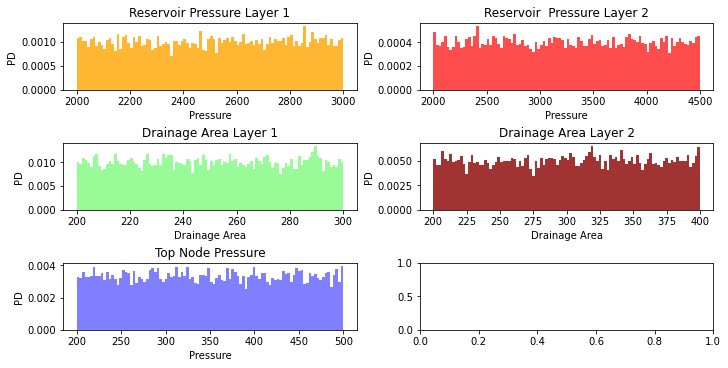

In [5]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(10,5), layout ='constrained')

Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 10000)
# Graficar distribución
ax[0,0].hist(Pr_L1, bins=100, density=True, align='mid', color=c_orange, alpha=0.8)
ax[0,0].set_xlabel('Pressure')
ax[0,0].set_ylabel('PD')
ax[0,0].set_title('Reservoir Pressure Layer 1')


Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 10000)
# Graficar distribución
ax[0,1].hist(Pr_L2, bins=100, density=True, align='mid', color=c_red, alpha=0.7)
ax[0,1].set_xlabel('Pressure')
ax[0,1].set_ylabel('PD')
ax[0,1].set_title('Reservoir  Pressure Layer 2')

DA_L1 = np.random.uniform(low = DA_L1_low, high = DA_L1_high, size = 10000)
# Graficar distribución
ax[1,0].hist(DA_L1, bins=100, density=True, align='mid', color=c_pale_green, alpha=1)
ax[1,0].set_xlabel('Drainage Area')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('Drainage Area Layer 1')

DA_L2 = np.random.uniform(low = DA_L2_low, high = DA_L2_high, size = 10000)
# Graficar distribución
ax[1,1].hist(DA_L2, bins=100, density=True, align='mid', color=c_Dred, alpha=0.8)
ax[1,1].set_xlabel('Drainage Area')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('Drainage Area Layer 2')


Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 10000)
# Graficar distribución
ax[2,0].hist(Top_Press, bins=100, density=True, align='mid', color=c_blue, alpha=0.5)
ax[2,0].set_xlabel('Pressure')
ax[2,0].set_ylabel('PD')
ax[2,0].set_title('Top Node Pressure');

### Create function to plot normal distributions

In [6]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit, V_x_Label, V_Title, n_col):
    
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[0,n_col].hist(N_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.7)
    AX[0,n_col].set_xlabel(V_x_Label)
    AX[0,n_col].set_ylabel('Probability Density')
    AX[0,n_col].set_title(V_Title)
    x_axis = AX[0,n_col].set_xlim()

    ## generate data for truncated normal distribution
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD,size=V_samples)

    ## Plot truncated Normal distribution
    AX[1,n_col].hist(NT_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.4)
    AX[1,n_col].set_xlabel(V_x_Label)
    AX[1,n_col].set_ylabel('Probability Density')
    AX[1,n_col].set_title(V_Title + ' (TRUNCATED)')
    AX[1,n_col].set_xlim(x_axis)


## Permeability Distributions

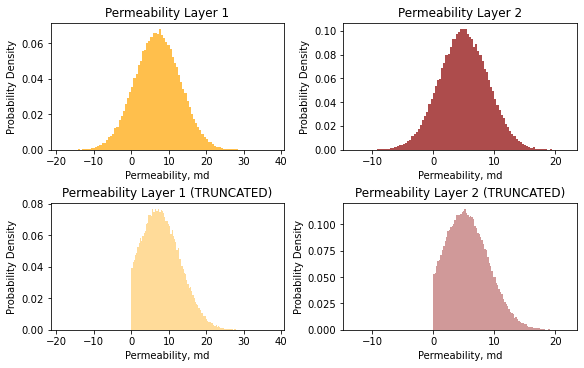

In [7]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Permeability Layer 1', 'Permeability, md'
RBG = c_orange
Generate_normal_and_Truncated(k_L1_mean, k_L1_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Permeability Layer 2', 'Permeability, md'
RBG = c_Dred
Generate_normal_and_Truncated(k_L2_mean, k_L2_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 1)

## Height Distributions

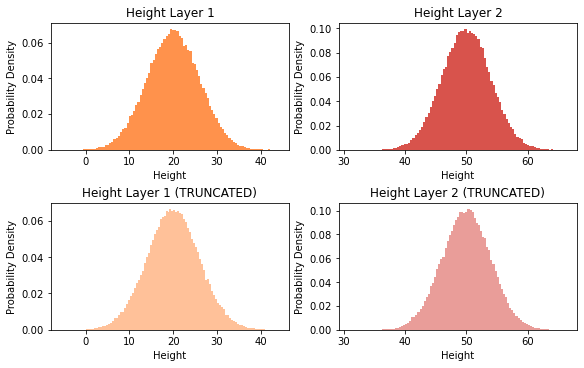

In [8]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Height Layer 1', 'Height'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(h_L1_mean, h_L1_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Height Layer 2', 'Height'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(h_L2_mean, h_L2_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 1)

## Skin Distributions

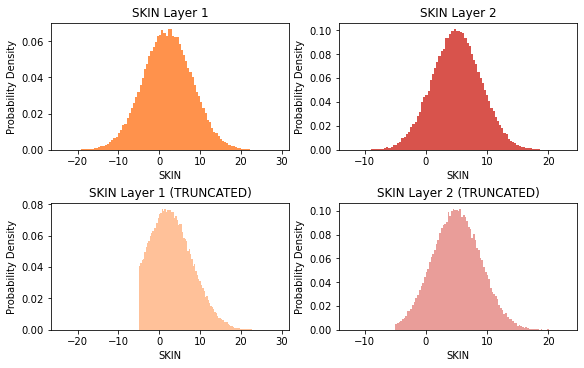

In [9]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'SKIN Layer 1', 'SKIN'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(S_L1_mean, S_L1_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'SKIN Layer 2', 'SKIN'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(S_L2_mean, S_L2_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 1)

## WGR Distribution

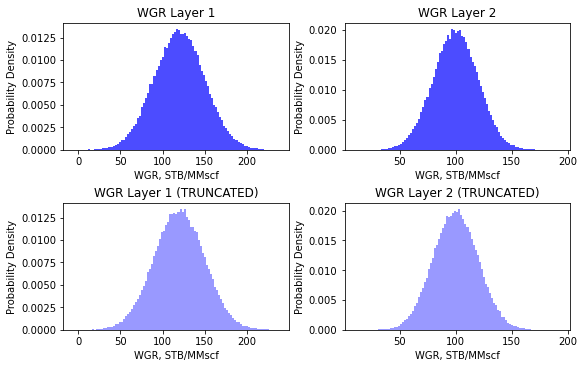

In [10]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'WGR Layer 1', 'WGR, STB/MMscf'
RBG = c_blue
Generate_normal_and_Truncated(WGR_L1_mean, WGR_L1_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'WGR Layer 2', 'WGR, STB/MMscf'
RBG = c_blue
Generate_normal_and_Truncated(WGR_L2_mean, WGR_L2_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 1)

<font color='blue'>
    
# 4. Start Calculations for Sensitivity Analysis
    # 1. Generate input variables based on distributions
    # 2. Send the input variables from Jupyter Notebook to Well model (PROSPER)
    # 3. Calculate Well Model
    # 4. Import results from Well Model (PROSPER) to Jupyter Notebook
***
</font>

In [30]:
### CELL 21 ###

## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list) # dictionary to save VLP and IPR Curves
my_dict_sol = defaultdict(list) # dictionary to save ALL Solutions
my_dict_sol_int = defaultdict(list) # dictionary to save iterations with solutions (Qg > 0)
my_dict_input_S = defaultdict(list) # dictionary to save Input WITH solution
my_dict_input_NS = defaultdict(list) # dictionary to save Input WITHOUT solution
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs from loop

c = OpenServer()
c.connect()

iter = 1000 ## Loop iterations
n = range(iter)

for i in n:
    
    print('Index: ', i)
    
    ## Reservoir Pressure Layer 1 ##
    if Pr_L1_Const == True:
        Pr_L1 =[Pr_L1_Val_Const]
    else:
        Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 1)
        
    my_dict_input_vals['Pr_L1'].extend(Pr_L1)
    #print('Reservoir Pressure L1 = ', Pr_L1)
    
    
    ## Reservoir Pressure Layer 2 ##
    if Pr_L2_Const == True:
        Pr_L2 =[Pr_L2_Val_Const]
    else:
        Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 1)
        
    my_dict_input_vals['Pr_L2'].extend(Pr_L2)
    print('Reservoir Pressure L1 = ', Pr_L1,'      ', 'Reservoir Pressure L2 = ', Pr_L2)

    
    
    ### DRAINAGE AREA LAYER 1 ###
    if DA_L1_Const == True:
        DA_L1 =[DA_L1_Val_Const]
    else:
        DA_L1 = np.random.uniform(low=DA_L1_low, high= DA_L1_high, size = 1)
        
    my_dict_input_vals['DA_L1'].extend(DA_L1)
    #print('Drainage Area L1 = ', DA_L1)
    
     ### DRAINAGE AREA LAYER 2 ###
    if DA_L2_Const == True:
        DA_L2 =[DA_L2_Val_Const]
    else:
        DA_L2 = np.random.uniform(low=DA_L2_low, high= DA_L2_high, size = 1)
        
    my_dict_input_vals['DA_L2'].extend(DA_L2)
    print('Drainage Area L1 = ', DA_L1, '            ','Drainage Area L2 = ', DA_L2)
    
    
   

    
    ### PERMEABILITY Layer 1 ###
    if k_L1_Const == True:
        k_L1 =[k_L1_Val_Const]
    else:
        mu = k_L1_mean #mean
        sigma = k_L1_SD #SD
        k_L1 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
                
    my_dict_input_vals['k_L1'].extend(k_L1)
    #print('Perm Layer 1 = ', k_L1)
    

    ### PERMEABILITY Layer 2 ###
    if k_L2_Const == True:
        k_L2 =[k_L2_Val_Const]
    else:
        mu = k_L2_mean #mean
        sigma = k_L2_SD #SD
        k_L2 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
                
    my_dict_input_vals['k_L2'].extend(k_L2)
    print('Perm Layer 1 = ', k_L1,'                  ','Perm Layer 2 = ', k_L2)
    

    ### HEIGHT Layer 1 ###
    if h_L1_Const == True:
        h_L1 =[h_L1_Val_Const]
    else:
        mu = h_L1_mean #mean
        sigma = h_L1_SD #SD
        h_L1 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    
    my_dict_input_vals['h_L1'].extend(h_L1)   
    #print('Height L1 = ', h_L1)

    
    ### HEIGHT Layer 2 ###
    if h_L2_Const == True:
        h_L2 =[h_L2_Val_Const]
    else:
        mu = h_L2_mean #mean
        sigma = h_L2_SD #SD
        h_L2 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['h_L2'].extend(h_L2)   
    print('Height L1 = ', h_L1,'                    ','Height L2 = ', h_L2)    
 
 
    ### SKIN LAYER 1 ###
    if S_L1_Const == True:
        S_L1 =[S_L1_Val_Const]
    else:
        mu = S_L1_mean #mean
        sigma = S_L1_SD #SD
        S_L1 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['S_L1'].extend(S_L1)   
    #print('SKIN L1 = ', S_L1)  
    
    
    ### SKIN LAYER 2 ###
    if S_L2_Const == True:
        S_L2 =[S_L2_Val_Const]
    else:
        mu = S_L2_mean #mean
        sigma = S_L2_SD #SD
        S_L2 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['S_L2'].extend(S_L2)   
    print('SKIN L1 = ', S_L1,'                       ','SKIN L2 = ', S_L2)      
    
   
    
    ### WGR LAYER 1 ###
    if WGR_L1_Const == True:
        WGR_L1 =[WGR_L1_Val_Const]
    else:
        mu = WGR_L1_mean #mean
        sigma = WGR_L1_SD #SD
        WGR_L1 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['WGR_L1'].extend(WGR_L1)   
    #print('WGR L1 = ', WGR_L1)  
    

    ### WGR LAYER 2 ###
    if WGR_L2_Const == True:
        WGR_L2 =[WGR_L2_Val_Const]
    else:
        mu = WGR_L2_mean #mean
        sigma = WGR_L2_SD #SD
        WGR_L2 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['WGR_L2'].extend(WGR_L2)   
    print('WGR L1 = ', WGR_L1,'               ','WGR L2 = ', WGR_L2)  
    



    ### TOP NODE PRESSURE ###
    if Top_Press_Const == True:
        Top_Press =[Top_Press_Val_Const]
    else:
        Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 1)
        
    my_dict_input_vals['Top_Press'].extend(Top_Press)  
    print('Top Node Pressure = ', Top_Press)      



    
    
    
    ###########################################
    ### SEND VALUES TO WELL MODEL - PROSPER ###
    
    ## Set Layer Pressure
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PRESSURE', Pr_L1) # Change Reservoir pressure for Layer 1
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PRESSURE', Pr_L2) # Change Reservoir pressure for Layer 2
    
    ## Set Layer Permeability
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PERM', k_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PERM', k_L2)
    
    ## Set Layer Height
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].HEIGHT', h_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].HEIGHT', h_L2)    
    
    ## Set Skin
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].SKIN', S_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].SKIN', S_L2) 
    
    ## Set WGR
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].WC', WGR_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].WC', WGR_L2) 
    
    ## Drainage Area
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].DAREA', DA_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].DAREA', DA_L2)
    
    ## Top Node Pressure
    c.DoSet('PROSPER.ANL.SYS.Pres', Top_Press)
    
    
    
    ### Calculate new IPR ### Required after changing IPR variables ###
    c.DoCmd('PROSPER.IPR.CALC')

    ## Calculate model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution

    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    print('------')
    print('Gas Rate', Gas_Sol)
    print('Pressure', BHP_SOL)
    print('------')
    
    T_val = 'Sol_Gas'
    my_dict_sol[T_val].extend([Gas_Sol])
    
    T_val = 'Sol_Pressure'
    my_dict_sol[T_val].extend([BHP_SOL])
    
    ## Insert Input Val to Dictionary When Calculation has NO Solution
    if Gas_Sol > 0:
        my_dict_sol_int['Sol_Gas'].extend([Gas_Sol])
        my_dict_sol_int['Sol_Pressure'].extend([BHP_SOL])
        
        my_dict_input_S['Pr_L1'].extend(Pr_L1)
        my_dict_input_S['Pr_L2'].extend(Pr_L2)
        my_dict_input_S['DA_L1'].extend(DA_L1)
        my_dict_input_S['DA_L2'].extend(DA_L2)
        my_dict_input_S['k_L1'].extend(k_L1)
        my_dict_input_S['k_L2'].extend(k_L2)
        my_dict_input_S['h_L1'].extend(h_L1)
        my_dict_input_S['h_L2'].extend(h_L2)
        my_dict_input_S['S_L1'].extend(S_L1)
        my_dict_input_S['S_L2'].extend(S_L2)
        my_dict_input_S['WGR_L1'].extend(WGR_L1)
        my_dict_input_S['WGR_L2'].extend(WGR_L2)
        my_dict_input_S['Top_Press'].extend(Top_Press)
        
    if Gas_Sol == 0: 
        my_dict_input_NS['Pr_L1'].extend(Pr_L1)
        my_dict_input_NS['Pr_L2'].extend(Pr_L2)
        my_dict_input_NS['DA_L1'].extend(DA_L1)
        my_dict_input_NS['DA_L2'].extend(DA_L2)
        my_dict_input_NS['k_L1'].extend(k_L1)
        my_dict_input_NS['k_L2'].extend(k_L2)
        my_dict_input_NS['h_L1'].extend(h_L1)
        my_dict_input_NS['h_L2'].extend(h_L2)
        my_dict_input_NS['S_L1'].extend(S_L1)
        my_dict_input_NS['S_L2'].extend(S_L2)
        my_dict_input_NS['WGR_L1'].extend(WGR_L1)
        my_dict_input_NS['WGR_L2'].extend(WGR_L2)
        my_dict_input_NS['Top_Press'].extend(Top_Press)   
    
    
    ## Insert to Dictionary VLP + IPR ##
    T_val = str(i) + '_G'
    my_dict[T_val].extend(Gas_Curve)
    
    T_val = str(i) + '_IPR'
    my_dict[T_val].extend(IPR_Curve)

    T_val = str(i) + '_VLP'
    my_dict[T_val].extend(VLP_Curve)
    
    if i < iter-1:
        clear_output(wait=True)
    
    
c.disconnect

#type(Gas_Curve)




Index:  999
Reservoir Pressure L1 =  [2500]        Reservoir Pressure L2 =  [4500]
Drainage Area L1 =  [200]              Drainage Area L2 =  [200]
Perm Layer 1 =  [7]                    Perm Layer 2 =  [2]
Height L1 =  [20]                      Height L2 =  [50]
SKIN L1 =  [2]                         SKIN L2 =  [5]
WGR L1 =  [125.12466547]                 WGR L2 =  [121.26198824]
Top Node Pressure =  [500]
------
Gas Rate 0.0
Pressure 0.0
------


<bound method OpenServer.disconnect of <openserver.openserver.OpenServer object at 0x000002883D179580>>

<font color='blue'>
    
# 5. CONVERT DICTIONARIES TO DATAFRAMES
CELL 22  
***
</font>


In [ ]:
### Show dictionary content ###
#print(my_dict_input_S)
#clear_output(wait=True)

In [31]:

df = pd.DataFrame(my_dict)                 # VLP and IPR

dfS = pd.DataFrame(my_dict_sol)            # Solutions ALl iterations (Qg and P)
dfS_In = pd.DataFrame(my_dict_sol_int)     # Solutions Iterations with solutions (Qg and P)

df_In_S = pd.DataFrame(my_dict_input_S)    # Input for iteration with solution 
df_In_NS = pd.DataFrame(my_dict_input_NS)  # Input for iterations without solution
dfIn = pd.DataFrame(my_dict_input_vals)    # Input for all iterations

<font color='blue'>
    
# 6. ANALYZE RESULTS -  PRESSURE + GAS RATE @ Solution Node
***
</font>

In [32]:
### CELL 26 ###
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(27,36)")

<IPython.core.display.Javascript object>

## Iterations with and without solution (VLP/IPR intersection)
    There are 2 dictionaries/DataFrames containing the results
    dfS = All iterations
    dfS_In = Iterations with solution (Qg > 0)

In [33]:
dfS.head(i+1).round(2)


,Sol_Gas,Sol_Pressure
0,3.01,2822.14
1,3.08,2813.60
2,2.55,2875.97
3,3.28,2790.82
4,0.00,0.00
...,...,...
995,7.53,2224.22
996,2.73,2854.96
997,0.00,0.00
998,3.02,2821.47


In [34]:
## Show how many solutions are = 0
Iterations_No_Sol = (dfS['Sol_Gas'] == 0).sum()

print('* Total Iterations = ', i+1)
print('* Iterations without Solution =', Iterations_No_Sol, '(',(Iterations_No_Sol/(i+1)*100).round(2),'%)' )
print('* Iterations with Solution =', (dfS['Sol_Gas'] > 0).sum())
print('')
## Compare mean from total iterations vs iterations with solution
Sol_Gas_mean = dfS['Sol_Gas'].mean()
Sol_Gas_mean_S = dfS_In['Sol_Gas'].mean() # In = intersection VLP vs IPR

print('* Gas Rate Mean = ', round(Sol_Gas_mean,2), 'Total Iterations')
print('* Gas Rate Mean = ', round(Sol_Gas_mean_S,2), 'Iterations with solution (Qg > 0) ');
print('')

Sol_Gas_SD = dfS['Sol_Gas'].std()
print("* Gas Rate Standard Deviation (SD) = ", np.round(Sol_Gas_SD, decimals = 3), 'Total Iterations')

Sol_Gas_SD_S = dfS_In['Sol_Gas'].std()
print("* Gas Rate Standard Deviation (SD) = ", np.round(Sol_Gas_SD_S, decimals = 3), 'Iterations with solution (Qg > 0) ')
print('')

Sol_Pressure_mean = dfS['Sol_Pressure'].mean()
print("* Pressure Solution Mean = ", np.round(Sol_Pressure_mean, decimals = 1))



* Total Iterations =  1000
* Iterations without Solution = 301 ( 30.1 %)
* Iterations with Solution = 699

* Gas Rate Mean =  1.98 Total Iterations
* Gas Rate Mean =  2.83 Iterations with solution (Qg > 0) 

* Gas Rate Standard Deviation (SD) =  1.323 Total Iterations
* Gas Rate Standard Deviation (SD) =  0.299 Iterations with solution (Qg > 0) 

* Pressure Solution Mean =  1987.4


In [35]:
### Compare DataFrames ###
dfS_col_names =dfS.columns.tolist()
dfS_In_col_names =dfS_In.columns.tolist()

df1 = dfS.head(10)
df2 = dfS_In.head(10)

df1 = df1.style.format(precision=2)
df2 = df2.style.format(precision=2)

df1_styler = df1.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')


display_html(df1_styler._repr_html_() + df2_styler._repr_html_() , raw=True)

,Sol_Gas,Sol_Pressure
0,3.01,2822.14
1,3.08,2813.60
2,2.55,2875.97
3,3.28,2790.82
4,0.00,0.00
5,2.81,2845.90
6,0.00,0.00
7,3.06,2816.85
8,0.00,0.00
9,2.51,2880.87


In [36]:
### Compare Stadistics ###
dfS_col_names =dfS.columns.tolist()
dfS_In_col_names =dfS_In.columns.tolist()

df1 = pd.DataFrame(dfS.describe(), columns=dfS_col_names)
df2 = pd.DataFrame(dfS_In.describe(), columns=dfS_In_col_names)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,Sol_Gas,Sol_Pressure
count,1000.000000,1000.000000
mean,1.979484,1987.398531
std,1.323368,1305.169955
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.648452,2830.765869
75%,2.894581,2859.785889
max,7.531299,2884.211426
,Sol_Gas,Sol_Pressure
count,699.000000,699.000000


## QC SOLUTION (P vs Qg) Data Generated with loop

### Plot Solutions as Scatter and Distributions

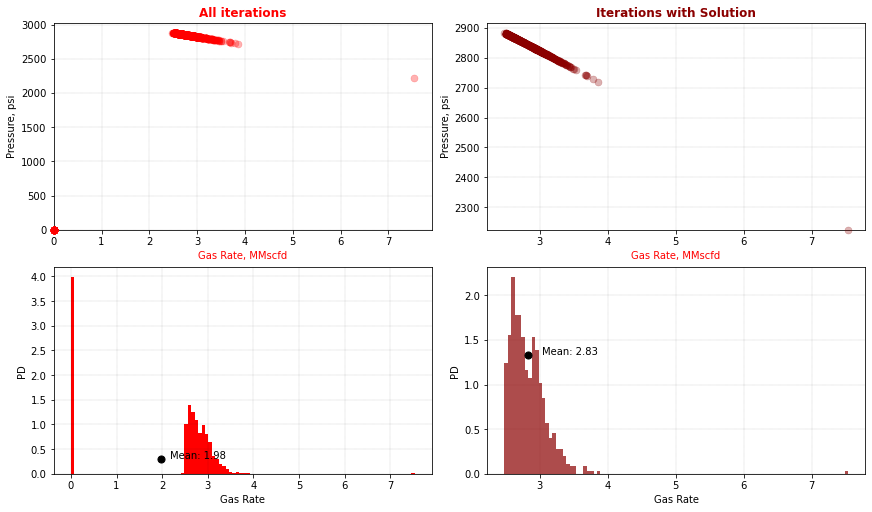

In [37]:
# Plot solutions
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,7), layout ='constrained')

ax[0,0].scatter(dfS['Sol_Gas'], dfS['Sol_Pressure'],  label='Solutions', color=c_red, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,0].set_ylabel('Pressure, psi')
ax[0,0].set_title('All iterations', weight='bold', color=c_red)
ax[0,0].set_xlim(left=0)
ax[0,0].set_ylim(bottom=0)

ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

## Generate Histogram for All Iterations ##
ax[1,0].hist(dfS['Sol_Gas'], bins=100, density=True, align='mid', color=c_red, alpha=1)
ax[1,0].set_xlabel('Gas Rate')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('')

## Plot Mean as Dot ##
Sol_Gas_pdf_mean = stats.norm(loc= Sol_Gas_mean, scale = Sol_Gas_SD).pdf(Sol_Gas_mean)
#print(Sol_Gas_pdf_mean)
ax[1,0].scatter(Sol_Gas_mean, Sol_Gas_pdf_mean,  label='Solutions',color=(0/255, 0/255, 0/255), alpha=1, s= 50)

ax[1,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));

#ax[1,0].annotate('Mean', (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));



###############################################
## Create flot for Iterations with Solution ###
ax[0,1].scatter(dfS_In['Sol_Gas'], dfS_In['Sol_Pressure'],  
           label='Solutions', color=c_Dred, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,1].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,1].set_ylabel('Pressure, psi')
ax[0,1].set_title('Iterations with Solution', weight='bold', color=c_Dred)

#ax[0,1].set_xlim(left=0)
ax[0,1].set_ylim(bottom=0)
pmin = dfS_In['Sol_Pressure'].min()
ax[0,1].set_ylim(bottom=pmin)

ax[0,1].grid(color = c_black, linestyle = '--', linewidth = 0.1)

## Generate Histogram for Iterations with Solution ##
ax[1,1].hist(dfS_In['Sol_Gas'], bins=100, density=True, align='mid', color=c_Dred, alpha=0.7)
ax[1,1].set_xlabel('Gas Rate')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('')

ax[1,1].set_axisbelow(True)
ax[1,1].grid(color = c_black, linestyle = '--', linewidth = 0.1)

## Plot Mean as Dot ##
Sol_Gas_pdf_mean = stats.norm(loc= Sol_Gas_mean_S, scale = Sol_Gas_SD_S).pdf(Sol_Gas_mean_S)
#print(Sol_Gas_pdf_mean)
ax[1,1].scatter(Sol_Gas_mean_S, Sol_Gas_pdf_mean,  label='Solutions',color=(0/255, 0/255, 0/255), alpha=1, s= 50)

str_text = 'Mean: '+ str(np.round(Sol_Gas_mean_S, decimals = 2))
ax[1,1].annotate(str_text, (Sol_Gas_mean_S+0.2, Sol_Gas_pdf_mean));

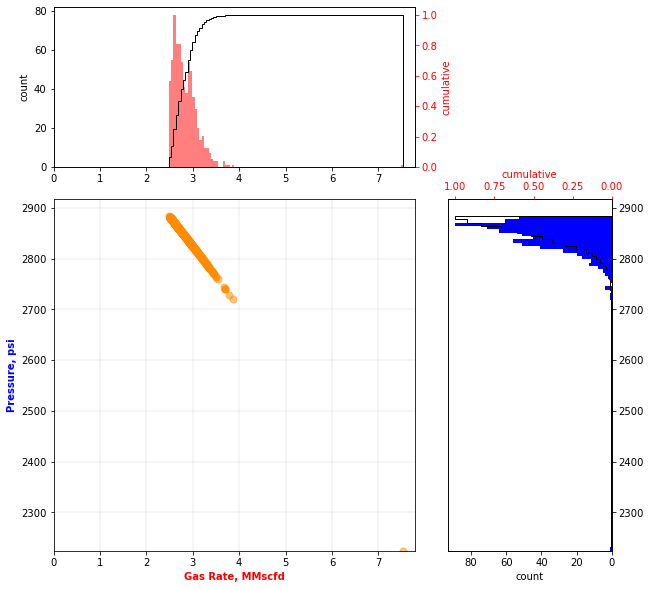

In [38]:
import matplotlib.gridspec as gridspec


x = dfS_In['Sol_Gas']
y = dfS_In['Sol_Pressure']

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5)

ax_main.set_xlabel('Gas Rate, MMscfd', color=c_red, weight='bold')
ax_main.set_ylabel('Pressure, psi', color=c_blue, weight='bold')

ax_main.set_axisbelow(True)
ax_main.grid(color = c_black, linestyle = '--', linewidth = 0.1, zorder=1)

ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)
ax_main.set_ylim(bottom=pmin)

## Gas Rate Distribution ##
ax_xDist.hist(x,bins=100,align='mid', color=c_red, alpha=0.5)
ax_xDist.set(ylabel='count')

ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

## Pressure Distribution ##
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color=c_blue)
ax_yDist.set(xlabel='count')

ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

ax_yDist.invert_xaxis()
ax_yDist.yaxis.tick_right()
ax_yCumDist.invert_xaxis()

plt.show()

<font color='blue'>
    
# 7. ANALYZE INPUT VALUES - GENERATED INSIDE LOOP
    CELL 36
***
</font>

In [39]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(39,51)")

<IPython.core.display.Javascript object>

## QC Input data generated with Loop

    There are 3 dictionaries/DataFrames containing the results
    dfIn = All iterations
    dfS_In_S = Iterations with solution (Qg > 0)
    df_In_NS = Input for iterations without solution (Qg = 0)

In [40]:
## Show Inputa DataFrame - ALL ITERATIONS
# i is generated inside Loop
dfIn.head(i+1)

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2500,4500,200,200,7,2,20,50,2,5,187.100024,78.381228,500
1,2500,4500,200,200,7,2,20,50,2,5,199.458680,74.142223,500
2,2500,4500,200,200,7,2,20,50,2,5,135.762572,106.934688,500
3,2500,4500,200,200,7,2,20,50,2,5,39.639624,62.377853,500
4,2500,4500,200,200,7,2,20,50,2,5,99.798760,118.344918,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2500,4500,200,200,7,2,20,50,2,5,153.289289,95.403173,500
996,2500,4500,200,200,7,2,20,50,2,5,89.072303,94.772746,500
997,2500,4500,200,200,7,2,20,50,2,5,29.449525,112.390618,500
998,2500,4500,200,200,7,2,20,50,2,5,158.593824,78.052203,500


## View DataFrame iterations with solutions (Qg > 0)

In [41]:
## Show Inputa DataFrame - ONLY ITERATIONS WITH SOLUTIONS
df_In_S

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2500,4500,200,200,7,2,20,50,2,5,187.100024,78.381228,500
1,2500,4500,200,200,7,2,20,50,2,5,199.458680,74.142223,500
2,2500,4500,200,200,7,2,20,50,2,5,135.762572,106.934688,500
3,2500,4500,200,200,7,2,20,50,2,5,39.639624,62.377853,500
4,2500,4500,200,200,7,2,20,50,2,5,137.386780,90.095119,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2500,4500,200,200,7,2,20,50,2,5,109.166545,104.575969,500
695,2500,4500,200,200,7,2,20,50,2,5,93.637700,94.352372,500
696,2500,4500,200,200,7,2,20,50,2,5,153.289289,95.403173,500
697,2500,4500,200,200,7,2,20,50,2,5,89.072303,94.772746,500


In [42]:
# Show Input Data Statistics - ALL ITERATIONS
dfIn.describe()

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0
mean,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,120.280806,100.105363,500.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.747620,20.634998,0.0
min,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,22.324655,33.839072,500.0
25%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,99.905960,85.263897,500.0
50%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,119.745144,100.197899,500.0
75%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,140.285915,114.798670,500.0
max,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,201.420822,171.851439,500.0


In [43]:
# Show Input Data Statistics - ONLY ITERATIONS WITH SOLUTIONS
df_In_S.describe()

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.000000,699.000000,699.0
mean,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,119.951601,89.786348,500.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.443296,14.484356,0.0
min,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,22.324655,33.839072,500.0
25%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,99.522605,80.828340,500.0
50%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,119.758269,92.159005,500.0
75%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,139.070811,101.298408,500.0
max,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,201.420822,119.862486,500.0


In [44]:
# Show Input Data Statistics - ONLY ITERATIONS WITHOUT SOLUTIONS
df_In_NS.describe()

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,301.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0,301.000000,301.000000,301.0
mean,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,121.045305,124.068791,500.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.478557,10.273001,0.0
min,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,29.449525,111.088770,500.0
25%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,101.611995,116.219579,500.0
50%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,119.732019,121.558840,500.0
75%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,143.258779,129.588769,500.0
max,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,201.145651,171.851439,500.0


## Plot Distribution for input variables (Iterations with Solution)

Total Input Variables =  13
Rows to Plot =  5
Plot Distribution for input variables (Iterations with Solution)


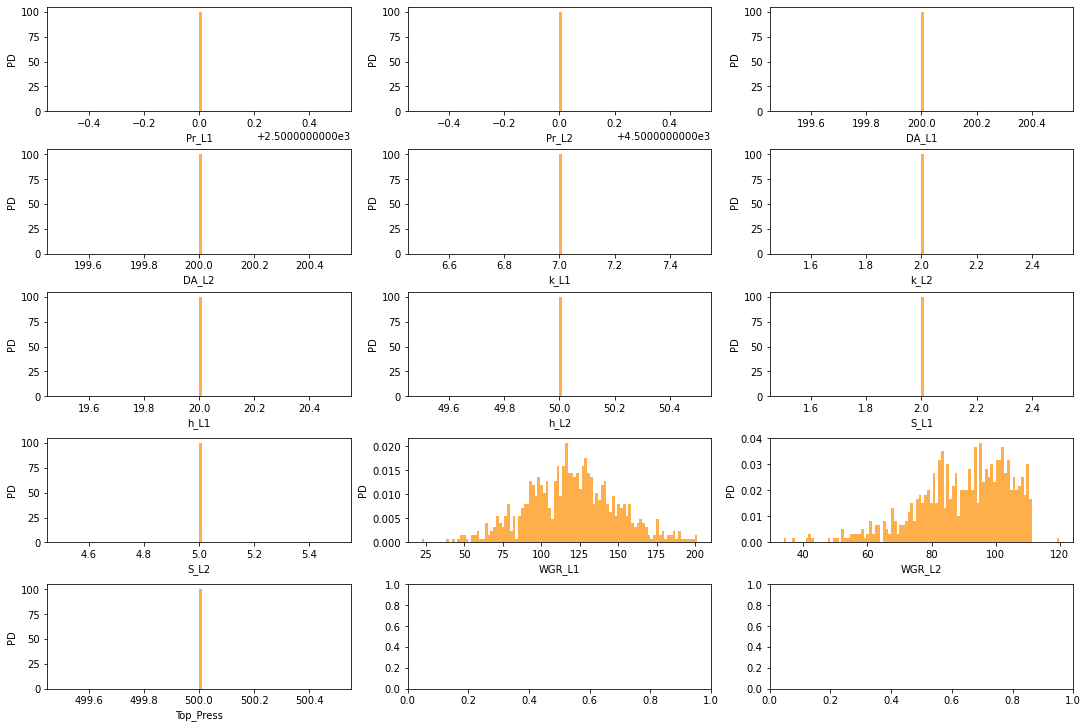

In [45]:
## Get Column names
df_col_names_Inputs = df_In_S.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_S[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', 
    color=(255/255, 140/255, 0/255), alpha=0.7)


    
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

print('Plot Distribution for input variables (Iterations with Solution)')

## Plot Distribution for input variables (Iterations without Solution, Qg = 0)

Total Input Variables =  13
Rows to Plot =  5
Plot Distribution for input variables (Iterations without Solution, Qg = 0)


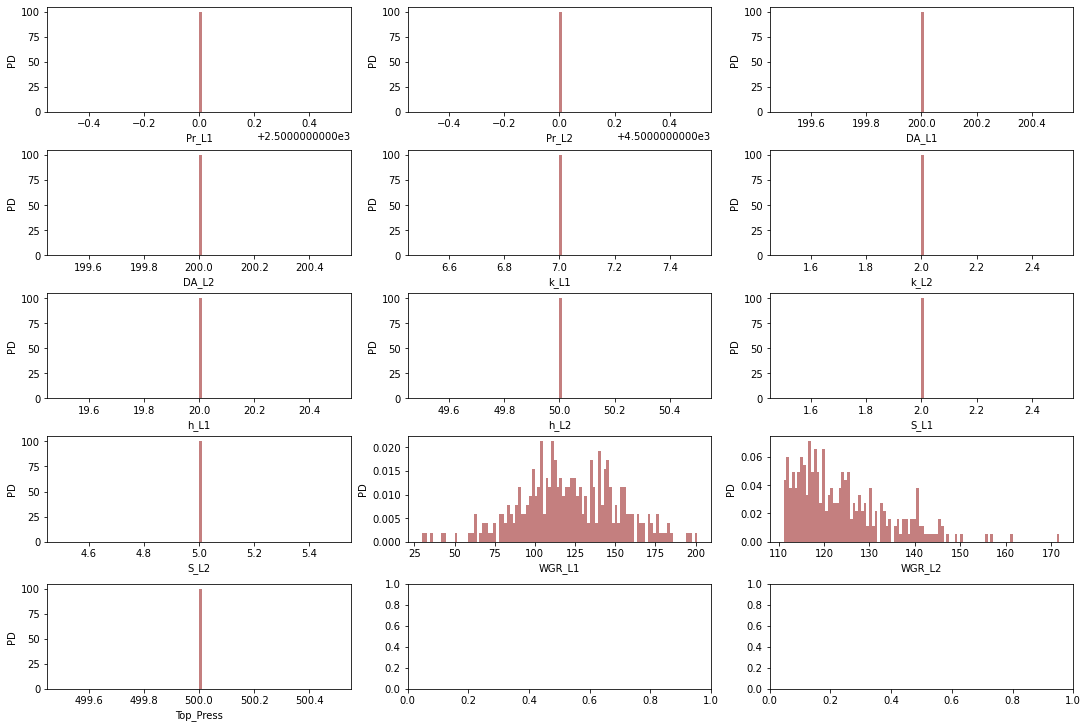

In [46]:
## Get Column names
df_col_names_Inputs =df_In_NS.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_NS[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_Dred, alpha=0.5)
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1
        
print('Plot Distribution for input variables (Iterations without Solution, Qg = 0)')

## Plot Distributions with solution and without solution next to each other

Total Input Variables =  13
Rows to Plot =  5


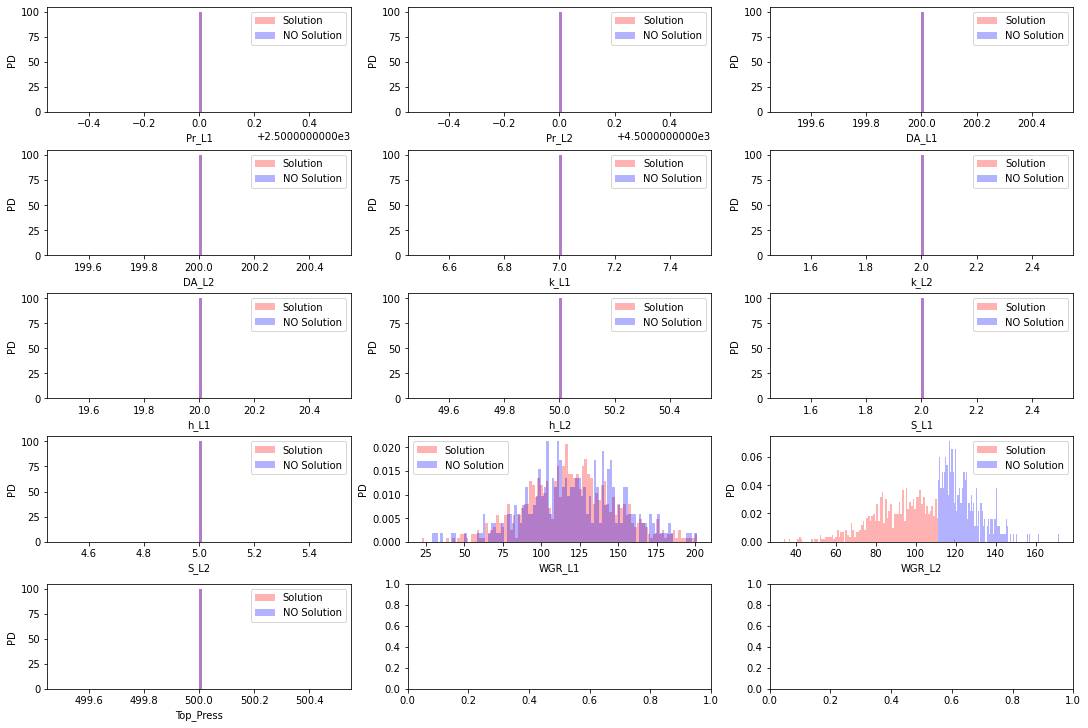

In [47]:
## Get Column names
df_col_names_Inputs = df_In_S.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_S[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_red, alpha=0.3, label='Solution')
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')

    AX[xx,yy].hist(df_In_NS[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_blue, alpha=0.3, label='NO Solution')
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].legend()
    #plt.legend()
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

<font color='blue'>
    
# 8. Create cross-plots input vs solutions
CELL 51
***
</font>



In [48]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(53,58)")

<IPython.core.display.Javascript object>

In [49]:
## Get Column names
df_col_names =df.columns.tolist()
df_col_names_In = dfIn.columns.tolist()
print(df_col_names_In)

['Pr_L1', 'Pr_L2', 'DA_L1', 'DA_L2', 'k_L1', 'k_L2', 'h_L1', 'h_L2', 'S_L1', 'S_L2', 'WGR_L1', 'WGR_L2', 'Top_Press']


## Cross-plots for all Iterations

Total Input Variables =  13
Rows to Plot =  5


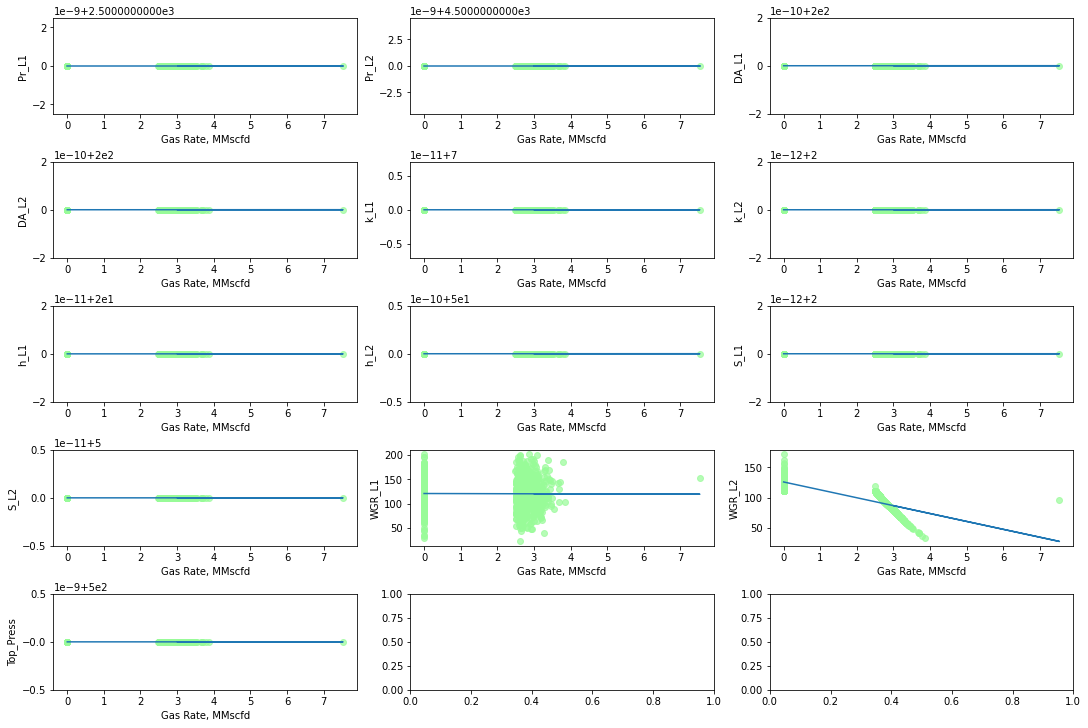

In [50]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(i)
    AX[xx,yy].scatter(dfS['Sol_Gas'], dfIn[df_col_names_In[ii]], color=c_pale_green, alpha=0.7)
    AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
    AX[xx,yy].set_ylabel(df_col_names_In[ii])
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
    x = dfS['Sol_Gas']
    y = dfIn[df_col_names_In[ii]]
    b, m = np.polynomial.polynomial.polyfit(x,y, 1)


    AX[xx,yy].plot(x, b + m * x, '-')

    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1


## Cross-Plots for Iterations with solutions

Total Input Variables =  13
Rows to Plot =  5


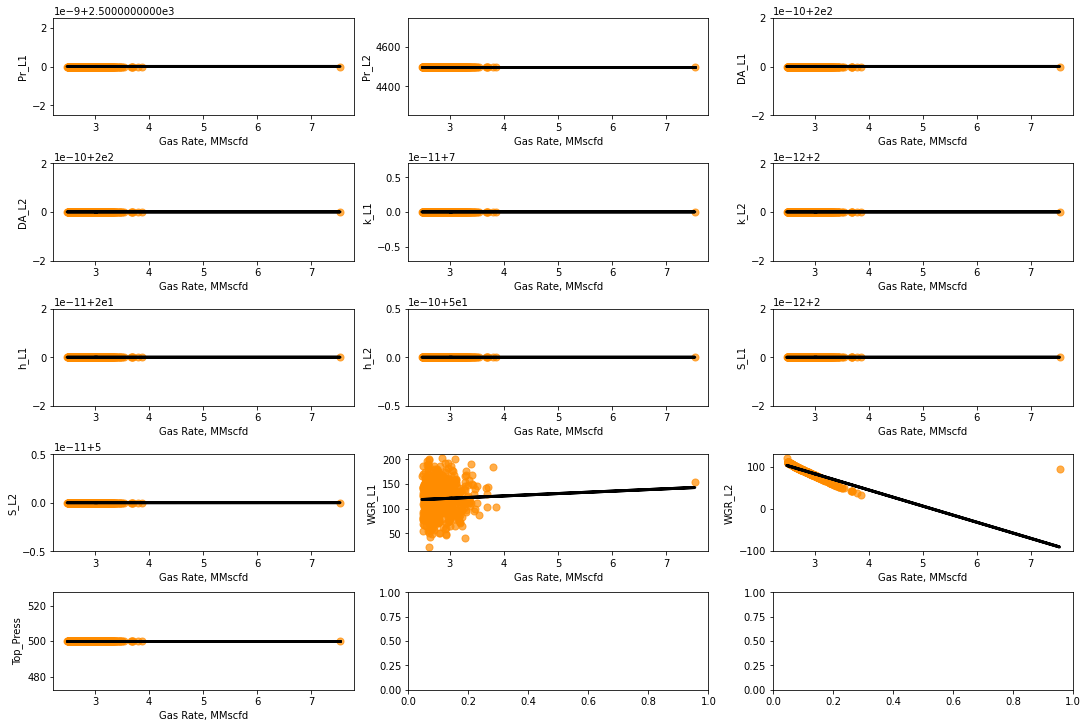

In [51]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(i)
    AX[xx,yy].scatter(dfS_In['Sol_Gas'], df_In_S[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7, s = 50)
    AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
    AX[xx,yy].set_ylabel(df_col_names_In[ii])
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
    x = dfS_In['Sol_Gas']
    y = df_In_S[df_col_names_In[ii]]
    b, m = np.polynomial.polynomial.polyfit(x,y, 1)


    AX[xx,yy].plot(x, b + m * x, '-', linewidth=3, color = c_black)

    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

<font color='blue'>
    
# 9. CALCULATE CORRELATION COEFFICIENTS
***
</font>

In [52]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(60,65)")

<IPython.core.display.Javascript object>

In [53]:
# Create new DF to append Gas solution to input variables
corr_DF = dfIn.copy(deep=True)

## Add Gas Solutions Column
corr_DF['Gas_Sol'] = dfS['Sol_Gas']
corr_DF

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press,Gas_Sol
0,2500,4500,200,200,7,2,20,50,2,5,187.100024,78.381228,500,3.012893
1,2500,4500,200,200,7,2,20,50,2,5,199.458680,74.142223,500,3.084997
2,2500,4500,200,200,7,2,20,50,2,5,135.762572,106.934688,500,2.552887
3,2500,4500,200,200,7,2,20,50,2,5,39.639624,62.377853,500,3.276045
4,2500,4500,200,200,7,2,20,50,2,5,99.798760,118.344918,500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2500,4500,200,200,7,2,20,50,2,5,153.289289,95.403173,500,7.531299
996,2500,4500,200,200,7,2,20,50,2,5,89.072303,94.772746,500,2.733578
997,2500,4500,200,200,7,2,20,50,2,5,29.449525,112.390618,500,0.000000
998,2500,4500,200,200,7,2,20,50,2,5,158.593824,78.052203,500,3.018571


In [54]:
## Check statistics for new DataFrame
corr_DF.describe()

,Pr_L1,Pr_L2,DA_L1,DA_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press,Gas_Sol
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.000000
mean,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,120.280806,100.105363,500.0,1.979484
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.747620,20.634998,0.0,1.323368
min,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,22.324655,33.839072,500.0,0.000000
25%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,99.905960,85.263897,500.0,0.000000
50%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,119.745144,100.197899,500.0,2.648452
75%,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,140.285915,114.798670,500.0,2.894581
max,2500.0,4500.0,200.0,200.0,7.0,2.0,20.0,50.0,2.0,5.0,201.420822,171.851439,500.0,7.531299


In [55]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

## Print Gas Rate vs Input Correlations
Gas_Sol_Coeff = corr_DF_Coeff['Gas_Sol']
type(Gas_Sol_Coeff)

### Convert to DataFrame ###
Gas_Sol_Coeff_df = pd.DataFrame(Gas_Sol_Coeff)
Gas_Sol_Coeff_df

,Gas_Sol
Pr_L1,NaN
Pr_L2,NaN
DA_L1,NaN
DA_L2,NaN
k_L1,NaN
k_L2,NaN
h_L1,NaN
h_L2,NaN
S_L1,NaN
S_L2,NaN


In [56]:
### Drop Gas Sol Row and NaN values ###
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.dropna()
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Gas_Sol'])

print(Gas_Sol_Coeff_df.index)
Gas_Sol_Coeff_df

Index(['WGR_L1', 'WGR_L2'], dtype='object')


,Gas_Sol
WGR_L1,-0.008946
WGR_L2,-0.836517


Text(0.5, 1.0, 'Correlation Between Input variables and Gas Rate (Solution)')

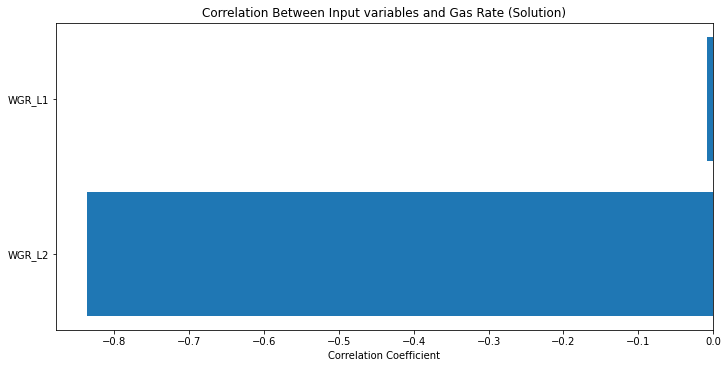

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df.index
#print(Input_Var_Names)
y_pos = np.arange(len(Input_Var_Names))
performance = 3 + 10 * np.random.rand(len(Input_Var_Names))
error = np.random.rand(len(Input_Var_Names))

#print(Gas_Sol_Coeff_df['Gas_Sol'])

ax.barh(y_pos, Gas_Sol_Coeff_df['Gas_Sol'], align='center')
ax.set_yticks(y_pos, labels=Input_Var_Names)


ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)')

<font color='blue'>
    
# 10. PLOT IPR VS VLP
***
</font>

In [58]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(68,73)")

<IPython.core.display.Javascript object>

In [ ]:
df.replace(0, np.nan, inplace=True)
df

In [59]:
df.describe()

,0_G,0_IPR,0_VLP,1_G,1_IPR,1_VLP,2_G,2_IPR,2_VLP,3_G,...,996_VLP,997_G,997_IPR,997_VLP,998_G,998_IPR,998_VLP,999_G,999_IPR,999_VLP
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,7.881661,2033.155525,6049.141000,7.881661,2033.155525,6046.377500,7.881661,2033.155525,6175.95950,7.881661,...,5848.855500,7.881661,2033.155525,5803.226000,7.881661,2033.155525,5932.521500,7.881661,2033.155525,6290.182500
std,4.898458,853.315488,2627.390132,4.898458,853.315488,2671.079891,4.898458,853.315488,2474.57217,4.898458,...,2257.316104,4.898458,853.315488,2047.149669,4.898458,853.315488,2514.004905,4.898458,853.315488,2466.365107
min,0.015760,83.504500,2576.850000,0.015760,83.504500,2525.660000,0.015760,83.504500,2851.47000,0.015760,...,2749.310000,0.015760,83.504500,2891.720000,0.015760,83.504500,2572.940000,0.015760,83.504500,2951.370000
25%,3.948713,1504.805000,4010.217500,3.948713,1504.805000,3964.545000,3.948713,1504.805000,4314.37500,3.948713,...,4170.130000,3.948713,1504.805000,4347.172500,3.948713,1504.805000,3999.082500,3.948713,1504.805000,4463.675000
50%,7.881655,2171.765000,5367.975000,7.881655,2171.765000,5354.140000,7.881655,2171.765000,5551.88000,7.881655,...,5326.420000,7.881655,2171.765000,5376.405000,7.881655,2171.765000,5293.335000,7.881655,2171.765000,5685.415000
75%,11.814600,2708.507500,8039.535000,11.814600,2708.507500,8073.865000,11.814600,2708.507500,8042.59500,11.814600,...,7524.405000,11.814600,2708.507500,7308.652500,11.814600,2708.507500,7822.927500,11.814600,2708.507500,8154.947500
max,15.747600,3153.960000,10883.000000,15.747600,3153.960000,10954.900000,15.747600,3153.960000,10736.20000,15.747600,...,10026.500000,15.747600,3153.960000,9583.490000,15.747600,3153.960000,10569.600000,15.747600,3153.960000,10824.900000


## Plot VLP and IPR for specific Iteration (Index_TP)

Iteration Index:  341
IPR col name:  341_G
VLP col name:  341_IPR
Gas Solution =  2.720003128
Pressure Solution =  2856.545410156


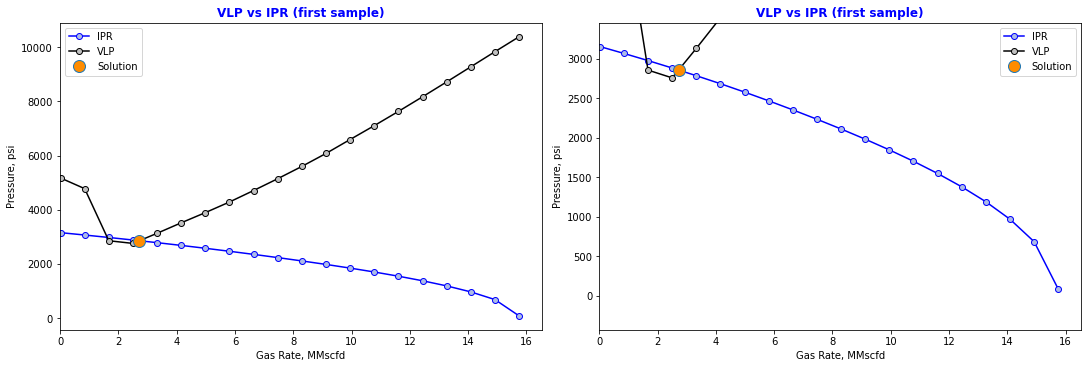

In [67]:
Index_TP = 341 ## Specify iteration to plot VLP, IPR and Solution

## Get Column names
df_col_names =df.columns.tolist()

print('Iteration Index: ', Index_TP)
print('IPR col name: ', df_col_names[Index_TP*3])
print('VLP col name: ', df_col_names[(Index_TP*3)+1])

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,5), layout ='constrained')

ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

ax[0].plot(dfS['Sol_Gas'].iloc[Index_TP], dfS['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 12,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

ax[0].set_xlabel('Gas Rate, MMscfd')
ax[0].set_ylabel('Pressure, psi')
ax[0].set_title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
ax[0].legend()
ax[0].set_xlim(left=0)



### Second Chart ###
ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

ax[1].plot(dfS['Sol_Gas'].iloc[Index_TP], dfS['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 12,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

ax[1].set_xlabel('Gas Rate, MMscfd')
ax[1].set_ylabel('Pressure, psi')
ax[1].set_title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
ax[1].legend()
ax[1].set_xlim(left=0)

P_max = df[df_col_names[(Index_TP*3)+1]].max()
ax[1].set_ylim(top=P_max+300)

#ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

#str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
#ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));

print("Gas Solution = ", dfS['Sol_Gas'].iloc[Index_TP])
print("Pressure Solution = ", dfS['Sol_Pressure'].iloc[Index_TP])


## 9.2 Plot multiple (IPR + VLP) curves

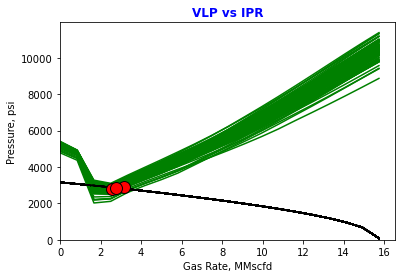

In [61]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(100)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)



x = np.percentile(dfS_In['Sol_Gas'], 90)
y = np.percentile(dfS_In['Sol_Pressure'], 90)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )


x = np.percentile(dfS_In['Sol_Gas'], 10)
y = np.percentile(dfS_In['Sol_Pressure'], 10)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )

x = np.percentile(dfS_In['Sol_Gas'], 50)
y = np.percentile(dfS_In['Sol_Pressure'], 50)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )

plt.show()